In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Attacker Accuracy vs Global ellison

In [ ]:
data_dir = '/home/ubuntu/results/global_epsilon_VS_attacker_accuracy_(2023-02-01_23-45)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
plt.plot(data['global_epsilon'], data['attacker_accuracy'])

In [ ]:
data_dir = '/home/ubuntu/results/global_epsilon_VS_overhead_(2023-02-01_21-44)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data.keys())
plt.plot(data['global_epsilon'], data['average_norm_distance'])

In [ ]:
def basic_composition(epsilon, k): 
  return epsilon*k
def advanced_composition(epsilon, delta, k): 
  return np.sqrt(2*k*np.log(1/(delta))) * epsilon + (k * epsilon)*(np.exp(epsilon)-1)

epsilons = np.linspace(0, 1, 100)
adv = [advanced_composition(epsilon, 0.1, 100) for epsilon in epsilons]
bsc = [basic_composition(epsilon, 100) for epsilon in epsilons]
plt.plot(epsilons, adv)
plt.plot(epsilons, bsc)

In [ ]:
data_dir = '/home/ubuntu/results/privacy_loss_vs_attacker_accuracy_(2023-03-03_01-52)/results.pkl'
plt.figure(dpi=300, figsize=(10,5))
data = pickle.load(open(data_dir, 'rb'))
acc = data['attacker_accuracy'][1:]
print(acc)
privacy_loss = data['privacy_loss'][1:]

plt.plot(privacy_loss,acc, label='DP-Shaping')

plt.plot([0, 50], [0.91, 0.91], 'r--', label='Without Shaping')
plt.plot([0, 50], [0.10, 0.10], 'g--', label='Constant-Rate ')
plt.xticks([0] + list(np.arange(10, 50+1, 10.0)))
plt.yticks([0] + list(np.arange(0.1, 1.0+0.1, 0.1)))
plt.xlabel('Privacy Loss')
plt.ylabel('Attacker Accuracy')
plt.legend()

[25.985706196344502]


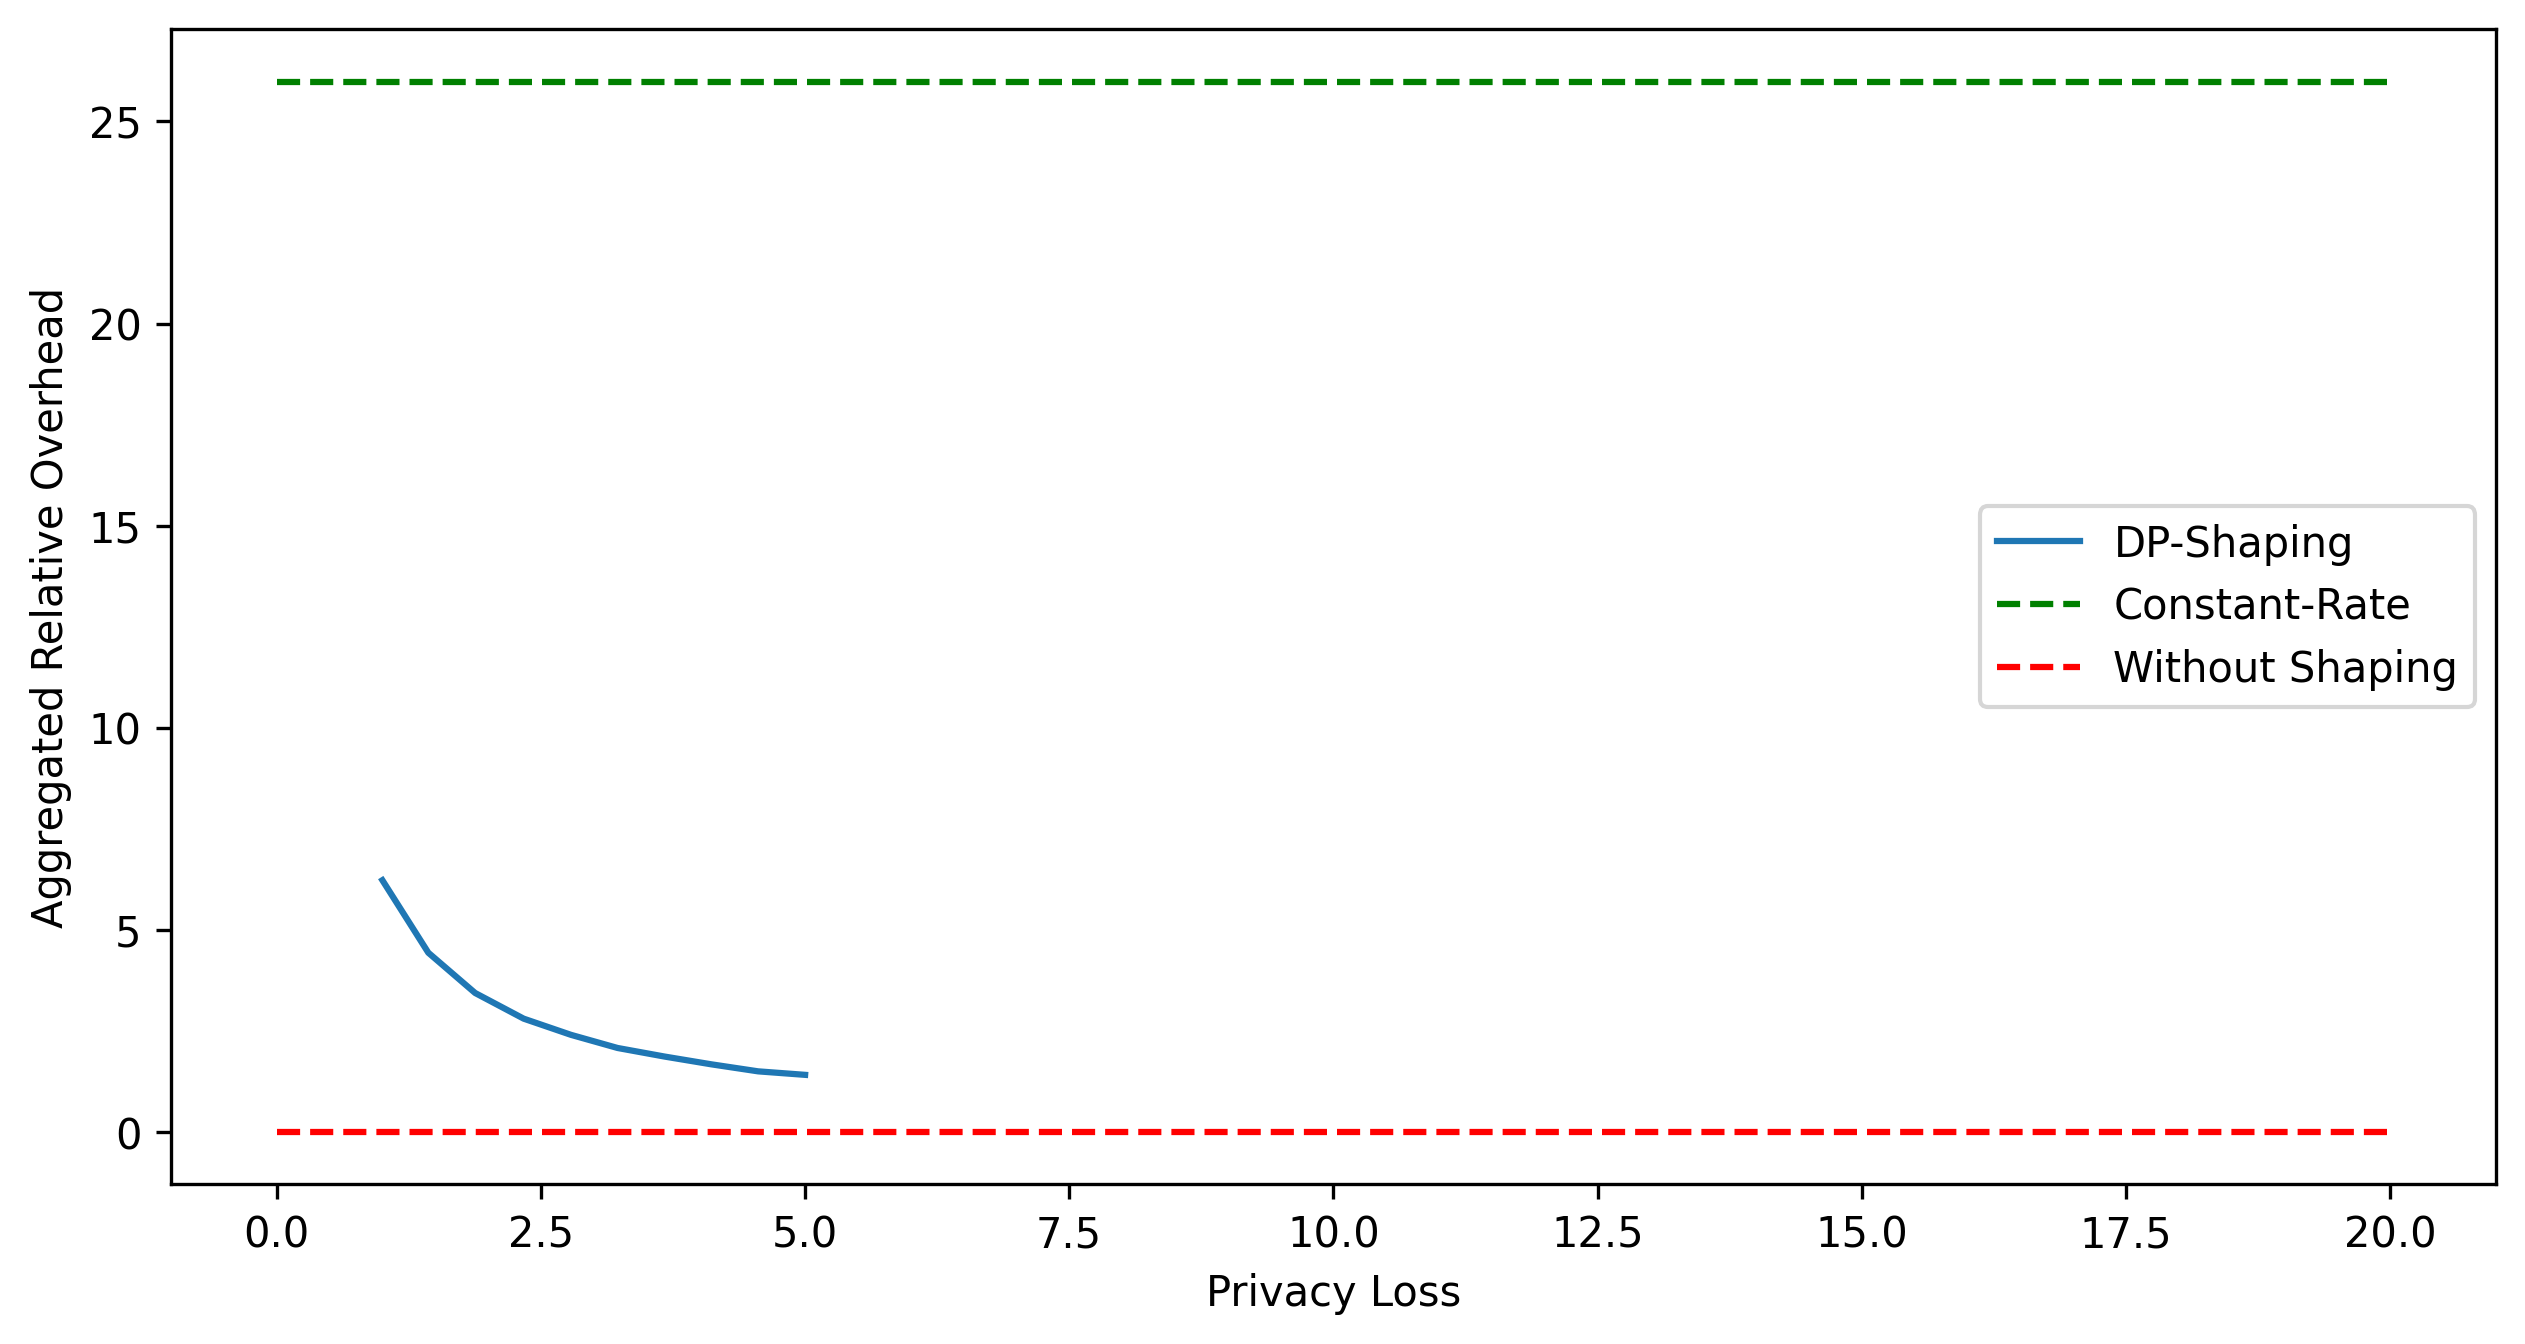

In [8]:
results_dir = '/home/ubuntu/results/privacy_loss_vs_overhead_(2023-04-03_00-12)/results.pkl'
baseline_results_dir = '/home/ubuntu/results/privacy_loss_vs_overhead_(2023-03-14_17-09)/baseline_results.pkl'

results = pickle.load(open(results_dir, 'rb'))
baseline_results = pickle.load(open(baseline_results_dir, 'rb'))


# print(data['average_aggregated_overhead'])
aao = results['average_aggregated_overhead']
ano = results['average_norm_distance']
awd = results['average_wasserstein_distance']
privacy_loss = results['privacy_loss']

baseline_aao = baseline_results['average_aggregated_overhead']
print(baseline_aao)
plt.figure(dpi=300, figsize=(10,5))
plt.plot(privacy_loss,aao, label='DP-Shaping')
plt.plot([0, 20], [baseline_aao, baseline_aao], 'g--', label='Constant-Rate')
plt.plot([0, 20], [0, 0], 'r--', label='Without Shaping')
# plt.xticks([0] + list(np.arange(10, 100+1, 10.0)))
# plt.yticks(list(np.arange(0, 23, 2)) + [24.88])
plt.xlabel('Privacy Loss')
plt.ylabel('Aggregated Relative Overhead')
plt.legend()

In [ ]:
data_dir = '/home/ubuntu/results/privacy_loss_VS_overhead_(2023-02-27_22-43)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data['average_aggregated_overhead'])
aao = data['average_aggregated_overhead']
ano = data['average_norm_distance']
awd = data['average_wasserstein_distance']
privacy_loss = data['privacy_loss']
plt.figure(dpi=300, figsize=(10,5))
plt.plot(privacy_loss,awd, label='DP-Shaping')
plt.plot([0, 100], [39.89, 39.89], 'g--', label='Constant-Rate')
plt.plot([0, 100], [0, 0], 'r--', label='Without Shaping')
plt.xticks([0] + list(np.arange(10, 100+1, 10.0)))
plt.yticks(list(np.arange(0, 39, 3)) + [39.89])
plt.xlim(0, 100)
plt.xlabel('Privacy Loss')
plt.ylabel('wasserstein distance')
plt.legend()

## BandB VS TCN (No shaping)

In [ ]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-25_01-02)/baseline_results.pkl'
data = pickle.load(open(data_dir, 'rb'))
BandB_acc = data['BandB_accuracy']
BandB_acc_avg = np.mean(BandB_acc, axis=1)
BandB_acc_std = np.std(BandB_acc, axis=1)
TCN_acc = data['TCN_accuracy']
TCN_acc_avg = np.mean(TCN_acc, axis=1)
TCN_acc_std = np.std(TCN_acc, axis=1)
class_num = data['classes_num']
plt.figure(dpi=100, figsize=(10,5))
plt.plot(class_num, BandB_acc_avg,label='BandB')
plt.plot(class_num, TCN_acc_avg, '--', label='TCN')
plt.xlabel('# of videos')
plt.ylabel('Attacker Accuracy')
plt.legend()

## BandB VS TCN (Shaping)

In [ ]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-07_22-07)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
BandB_acc = data['BandB_accuracy']
TCN_acc = data['TCN_accuracy']
privacy_loss = data['privacy_loss']
plt.figure(dpi=100, figsize=(10,5))
plt.plot(privacy_loss, BandB_acc,label='BandB')
plt.plot(privacy_loss, TCN_acc, '--', label='TCN')
plt.xlabel('Privacy Loss')
plt.ylabel('Attacker Accuracy')
plt.legend()

## BandB VS TCN (Shaping) mean-var

In [ ]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-21_15-48)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))


privacy_loss = data['privacy_loss']

TCN_acc = data['TCN_accuracy']
print(TCN_acc)
# TCN_min_acc = np.min(TCN_acc, axis=1)
# TCN_max_acc = np.max(TCN_acc, axis=1)
TCN_avg_acc = np.mean(TCN_acc, axis=1)
TCN_std_acc = np.std(TCN_acc, axis=1)

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
ax.plot(privacy_loss, TCN_avg_acc,label='BandB_avg')
ax.fill_between(privacy_loss, TCN_avg_acc - TCN_std_acc, TCN_avg_acc + TCN_std_acc, alpha=0.2)
ax.set_xlabel("Privacy Loss")
ax.set_ylabel("Attacker Test Accuracy")
ax.set_title("TCN model")

# fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
# ax.plot(privacy_loss, BandB_avg_acc,label='BandB_avg')
# ax.fill_between(privacy_loss, BandB_avg_acc - BandB_std_acc, BandB_avg_acc + BandB_std_acc, alpha=0.2)
# ax.set_xlabel("Privacy Loss")
# ax.set_ylabel("Attacker Test Accuracy")
# ax.set_title("BandB model")





# privacy_loss = data['privacy_loss']
# plt.figure(dpi=100, figsize=(10,5))
# plt.plot(privacy_loss, BandB_avg_acc,label='BandB_avg')
# plt.plot(privacy_loss, BandB_max_acc,label='BandB_max')
# plt.plot(privacy_loss, BandB_min_acc,label='BandB_min')
# plt.plot(privacy_loss, TCN_acc, '--', label='TCN')
# plt.xlabel('Privacy Loss')
# plt.ylabel('Attacker Accuracy')
# plt.legend()

## Data Analysis

### Overhead

In [5]:
results_dir = "/home/ubuntu/results/data_analysis/overhead_(2023-04-04_02-30)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
print(results)

{'noise_multiplier': [12.5, 25, 25, 50, 75], 'privacy_loss': [(6.9070775393471555, 4.1), (3.213538769673578, 7.2), (3.213538769673578, 7.2), (1.5475283643313484, 13.0), (1.0180880897531324, 20.0)], 'aggregated_overhead': [0.9584966086948955, 0.9824422304119108, 1.042785555321083, 1.0334538855443114, 1.0428223393383822], 'norm_overhead': [1.179169259033573, 1.2230363278321836, 1.3078669259622786, 1.272849796283064, 1.295356911820756], 'wasserstein_distance': [15.79425860721107, 16.23166766484689, 17.968259581247324, 17.361080410037108, 17.59493435554036], 'DP_interval_length_us': [1000000, 1000000, 1000000, 1000000, 1000000], 'send_interval_length_us': [50000, 50000, 50000, 50000, 50000]}


### Privacy

In [4]:
results_dir = "/home/ubuntu/results/data_analysis/privacy_(2023-04-03_22-17)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
print(results)

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'noise_multiplier': [25, 25, 50, 75], 'privacy_loss': [(3.213538769673578, 7.2), (3.213538769673578, 7.2), (1.5475283643313484, 13.0), (1.0180880897531324, 20.0)], 'TCN_accuracy_shaped': [[tensor(0.2364), tensor(0.1636), tensor(0.2000), tensor(0.1636), tensor(0.3273)], [tensor(0.2364), tensor(0.1636), tensor(0.2364), tensor(0.2182), tensor(0.0909)], [tensor(0.2000), tensor(0.2909), tensor(0.2000), tensor(0.2000), tensor(0.2182)], [tensor(0.2636), tensor(0.1818), tensor(0.2364), tensor(0.2727), tensor(0.2273)]], 'TCN_precision_shaped': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'TCN_recall_shaped': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]], 'BandB_accuracy_shaped': [[0.06363636363636363, 0.06363636363636363, 0.09090909090909091, 0.07272727272727272, 0.09090909090909091], [0.09090909090909091, 0.06363636363636363, 0.06363636363636363, 0.06363636363636363, 0.05454545454545454], [0.07272727272727272, 0.05454545454545454, 0.045454545454